<a href="https://colab.research.google.com/github/IsokGta7/IsokGta7.github.io/blob/main/Notebooks/02-Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Preprocesamiento de Texto</h1>

En esta notebook visualizaremos algunos conceptos del preprocesamiento de texto, particularmente:

* Tokenización
* Stemming
* Named Entity Recognition
* POS Tagging

Para esto, estudiaremos algunos ejemplos que serán procesados por las clases del módulo [spaCy](https://spacy.io/). No es una guía minuciosa del uso de este módulo, son solamente algunos ejemplos ilustrativos.

Verificar que la versión de spaCy sea la 3.*

In [1]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.5                         
Location         /usr/local/lib/python3.11/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.11.11                       
Pipelines        en_core_web_sm (3.7.1)        



In [2]:
 import spacy

Ya que hemos importado spaCy, necesitamos cargar un modelo estadístico de lenguaje. SpaCy ofrece una variedad de modelos para diferentes idiomas. Estos modelos ayudan con la tokenization, etiquetado PoS (part-of-speech), NER (named entity recognition) y más.

Bajamos y cargamos el modelo estadístico de lenguaje **en_core_web_sm**, es el modelo más pequeño en inglés de spaCy y un buen punto de partida.

Documentación del modelo: https://spacy.io/models/en#en_core_web_sm<br>
Modelos disponibles: https://spacy.io/models<br>
Uso de los modelos: https://spacy.io/usage/models

🔵 Información adicional del modelo

**en_core_web_sm** fué entrenado en el corpus OntoNotes 5, el cual es un corpus anotado que contiene noticias, blogs, transcripciones, etc. Los documentos del corpus están anotados con información de como cada oración debería *parsearse* (parsing), part-of-speech de cada palabra, si cada palabra es una *named entity*, entre otras cosas.

https://catalog.ldc.upenn.edu/LDC2013T19



En principio no hay necesidad de bajarlo, observar en la información del modulo que ya está disponible.

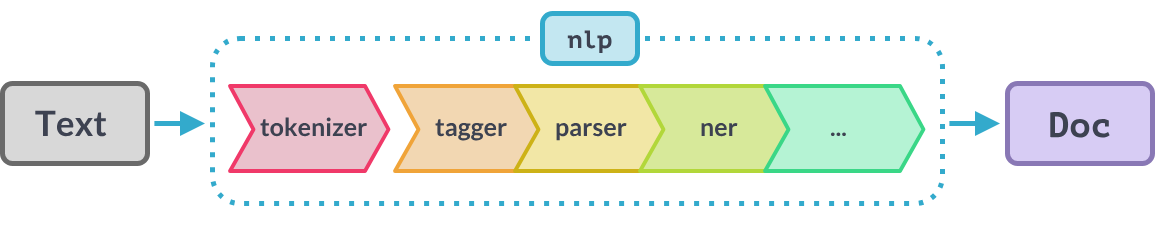

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
nlp = spacy.load('en_core_web_sm')

Ya hemos cargado el modelo, la variable `nlp` hace referencia a una instancia de la clase [`Language`](https://spacy.io/api/language) que contiene metodos para varias tareas (tokenización, etc.) y un pipeline de procesamiento.

Usaremos este modelo de lenguaje para realizar algunas tareas de preprocesamiento de PLN.


In [5]:
type(nlp)

spacy.lang.en.English

# Tokenización


Al pasar cualquier texto a la instancia `nlp` obtenemos un objeto [`Doc`](https://spacy.io/api/doc) que contiene el texto tokenizado e información adicional para cada [token](https://spacy.io/api/token).

In [6]:
# Sample sentence.
text = "He didn't want to pay $20 for this book."
doc = nlp(text)
print(doc,'\n',type(doc))

He didn't want to pay $20 for this book. 
 <class 'spacy.tokens.doc.Doc'>


Veamos los tokens

In [7]:
print([t.text for t in doc])

['He', 'did', "n't", 'want', 'to', 'pay', '$', '20', 'for', 'this', 'book', '.']


Observar que:
- "didn't" se separa en "did" y "n't".
- El símbolo de moneda y el número están separados.
- El punto final es también un token.

Si tokenizaramos sólo considerando los espacios en blanco:

In [8]:
text.split()

['He', "didn't", 'want', 'to', 'pay', '$20', 'for', 'this', 'book.']

El objeto `Doc` puede ser indexado y *sliced* como si fuera una lista:

In [9]:
print(doc[0])
print(type(doc[0]))

He
<class 'spacy.tokens.token.Token'>


In [10]:
print(doc[:3])
print(doc[-5:])

He didn't
20 for this book.


Podemos recuperar el texto original:

In [11]:
print(doc.text)

He didn't want to pay $20 for this book.


Podemos tokenizar multiples oraciones y accesar a ellas individualmente usando la propiedad `sents` del objeto `Doc`.

In [12]:
s = """Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next. First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc_2 = nlp(s)

for j,sent in enumerate(doc_2.sents):
    print(f"Oración {j}:\n{sent}\n")


Oración 0:
Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to wonder what
was going to happen next.

Oración 1:
First, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she looked at
the sides of the well, and noticed that they were filled with cupboards and
book-shelves; here and there she saw maps and pictures hung upon pegs.



In [14]:
print([token.text for token in doc_2])

['Either', 'the', 'well', 'was', 'very', 'deep', ',', 'or', 'she', 'fell', 'very', 'slowly', ',', 'for', 'she', '\n', 'had', 'plenty', 'of', 'time', 'as', 'she', 'went', 'down', 'to', 'look', 'about', 'her', 'and', 'to', 'wonder', 'what', '\n', 'was', 'going', 'to', 'happen', 'next', '.', 'First', ',', 'she', 'tried', 'to', 'look', 'down', 'and', 'make', 'out', 'what', '\n', 'she', 'was', 'coming', 'to', ',', 'but', 'it', 'was', 'too', 'dark', 'to', 'see', 'anything', ';', 'then', 'she', 'looked', 'at', '\n', 'the', 'sides', 'of', 'the', 'well', ',', 'and', 'noticed', 'that', 'they', 'were', 'filled', 'with', 'cupboards', 'and', '\n', 'book', '-', 'shelves', ';', 'here', 'and', 'there', 'she', 'saw', 'maps', 'and', 'pictures', 'hung', 'upon', 'pegs', '.']


Algunos casos de errores en la tokenización: https://github.com/explosion/spaCy/issues/3052



In [19]:
texto = '''El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2​ Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alto de la ciudad de Nueva York por detrás de One World Trade Center y Central Park Tower.'''

In [20]:
nlp = spacy.load("es_core_news_sm")

OSError: [E050] Can't find model 'es_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
!python -m spacy download es_core_news_sm

In [ ]:
import spacy

nlp_sp = spacy.load("es_core_news_sm")

In [17]:
doc_sp = nlp_sp(texto)

NameError: name 'nlp_sp' is not defined

In [21]:
tokens = [token.text for token in doc_sp]
for token in doc_sp:
  print(token.text)

NameError: name 'doc_sp' is not defined

# Reconocimiento de entidades nombradas (NER)

Podemos buscar entidades nombradas en el texto usando las anotaciones de los tokens

In [22]:
entities = list(doc.ents)

print(entities)
print(entities[0].label_)

[20]
MONEY


In [23]:
doc_3 = nlp('''I have $20 worth of things to buy in New York city,
I can afford more things in Mexico or Latin America, certainly not the Starry Night painting though.
Lastly, I think I met Zeus at a McKenzie group consulting meeting in NYC last summer.''')

[(x,x.label_) for x in list(doc_3.ents)]

[(20, 'MONEY'),
 (New York, 'GPE'),
 (Mexico, 'GPE'),
 (Latin America, 'LOC'),
 (Starry Night, 'WORK_OF_ART'),
 (Zeus, 'PERSON'),
 (McKenzie, 'ORG'),
 (NYC, 'LOC'),
 (last summer, 'DATE')]

Observa que el NER no agrupa tokens juntos, estas agrupaciones se hacen de forma separada en el atributo `ents`.

In [24]:
[x.text for x in doc_3]

['I',
 'have',
 '$',
 '20',
 'worth',
 'of',
 'things',
 'to',
 'buy',
 'in',
 'New',
 'York',
 'city',
 ',',
 '\n',
 'I',
 'can',
 'afford',
 'more',
 'things',
 'in',
 'Mexico',
 'or',
 'Latin',
 'America',
 ',',
 'certainly',
 'not',
 'the',
 'Starry',
 'Night',
 'painting',
 'though',
 '.',
 '\n',
 'Lastly',
 ',',
 'I',
 'think',
 'I',
 'met',
 'Zeus',
 'at',
 'a',
 'McKenzie',
 'group',
 'consulting',
 'meeting',
 'in',
 'NYC',
 'last',
 'summer',
 '.']

Algunas etiquetas de las entidades son:

* PERSON People, including fictional
* NORP Nationalities or religious or political groups
* FACILITY Buildings, airports, highways, bridges, etc.
* ORGANIZATION Companies, agencies, institutions, etc.
* GPE Countries, cities, states
* LOCATION Non-GPE locations, mountain ranges, bodies of water
* PRODUCT Vehicles, weapons, foods, etc. (Not services)
* EVENT Named hurricanes, battles, wars, sports events, etc.
* WORK OF ART Titles of books, songs, etc.
* LAW Named documents made into laws
* LANGUAGE Any named language

In [25]:
spacy.explain('GPE')

'Countries, cities, states'

Spacy cuenta con algunos visualizadores para NER y otras tareas.

https://spacy.io/usage/visualizers

In [26]:
from spacy import displacy

displacy.render(doc_3, style='ent', jupyter=True)

Podemos obtener, además, los índices de cada entidad en el texto original.

In [27]:
print([(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc_3.ents])

[('20', 'MONEY', 8, 10), ('New York', 'GPE', 37, 45), ('Mexico', 'GPE', 80, 86), ('Latin America', 'LOC', 90, 103), ('Starry Night', 'WORK_OF_ART', 123, 135), ('Zeus', 'PERSON', 175, 179), ('McKenzie', 'ORG', 185, 193), ('NYC', 'LOC', 222, 225), ('last summer', 'DATE', 226, 237)]


Para corpus domain-specific, un etiquetador NER puede ser afinado. En este ejemplo sería bueno que _The Martian_ fuera etiquetado como "FILM".

🔵 Esto puede aparecer más adelante en los ejercicios y en el curso.

In [28]:
s = "Ridley Scott directed The Martian."
doc = nlp(s)
displacy.render(doc, style='ent', jupyter=True)

In [29]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [30]:
print([(ent.text, ent.label_) for ent in doc_sp.ents])

NameError: name 'doc_sp' is not defined

In [31]:
from spacy import displacy

displacy.render(doc_sp, style='ent', jupyter=True)

NameError: name 'doc_sp' is not defined

## Ejercicios



### 1. Exploración descriptiva de documentos mediante tokenización

En este primer ejemplo describiremos el contenido de varios documentos que tratan sobre baseball. Exploraremos los términos más frecuentes mediante la construcción de una nube de palabras. Haremos el ejercicios usando, y sin usar, tokenización.

In [32]:
!pip install -qq wordcloud

In [33]:
from sklearn.datasets import fetch_20newsgroups

docs_newsgroups = fetch_20newsgroups(subset='train',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=['rec.sport.baseball']
                                     )

lista_docs_20ng = docs_newsgroups.data
print(f"{len(lista_docs_20ng)} documentos")

597 documentos


Sin tokenizar:

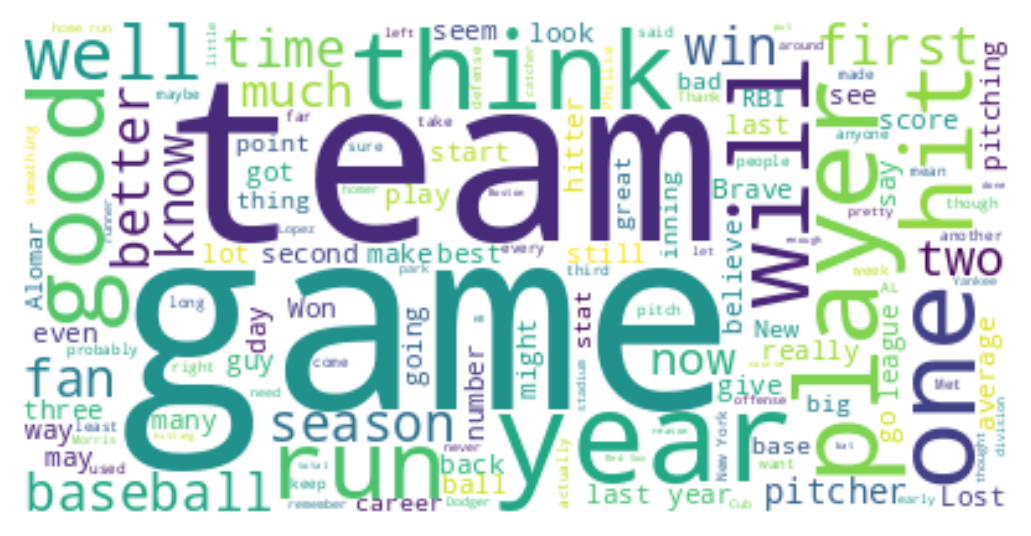

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_docs_20ng))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizando:

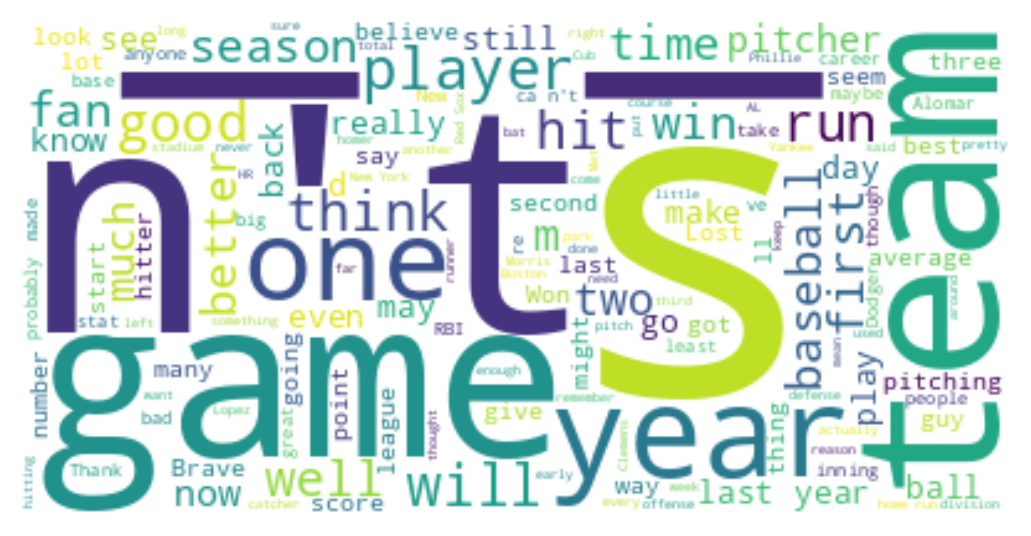

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs_spacy = nlp(" ".join(lista_docs_20ng))
lista_tokens = [t.text for t in docs_spacy]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))

plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizar y quitar palabras *problemáticas* (stop-words):

In [ ]:
from collections import Counter

dict(sorted(Counter(lista_tokens).items(), key=lambda x: x[1], reverse=True))

In [ ]:
lista_tokens = [t.text for t in docs_spacy
                if t.text not in ["n't","."," ","'s","_","\n"]]

wc = WordCloud(background_color="white")
wc_img = wc.generate(" ".join(lista_tokens))
plt.figure(dpi=200)
plt.imshow(wc_img, interpolation='bilinear')
plt.axis("off")
plt.show()

### Imprime una lista de todas las entidades nombradas que aparecen en estos documentos

Al ser de baseball podrían aparecer nombres de jugadores y equipos, ¿el NER los atrapa?

# Atributos adicionales de los tokens


spaCy realiza un pipeline de preprocesamiento (excepto el stemming) de forma *oculta*. De acuerdo con su política no destructiva, los tokens no se modifican directamente. Más bien, cada objeto **Token** tiene una serie de atributos que pueden ayudarle a obtener versiones del documento con ciertos pasos de preprocesamiento aplicados. Los atributos que tiene un **Token** se pueden encontrar aquí:<br>
https://spacy.io/api/token#attributes
<br><br>
More information about spaCy's processing pipeline:<br>
https://spacy.io/usage/processing-pipelines

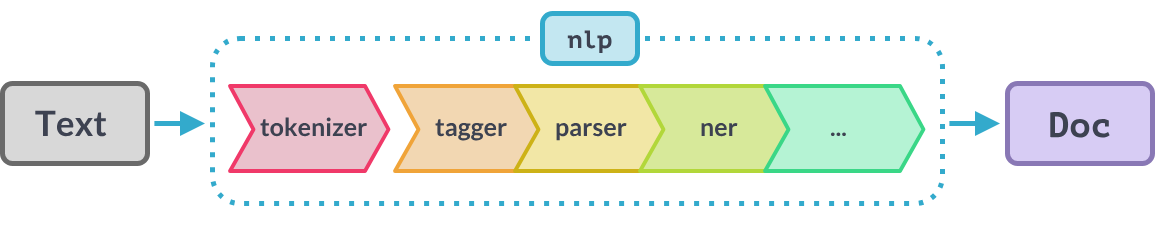

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

s = "Scientists have developed a new, more energy-efficient way for AI algorithms to process data. His model may become the basis for a new generation of AI that learns like we do."
doc = nlp(s)

Probemos algunos atributos de algunos tokens

In [ ]:
doc[0].ent_id_, doc[0].lemma_

## Mayúsculas/Minúsculas

Podemos escribir los tokens en minúsculas:

In [ ]:
print([t.lower_ for t in doc])

Esto nos da flexibilidad para realizar otras tareas, como no cambiar a minúscula si es el inicio de una oración.

In [ ]:
print([t.lower_ if not t.is_sent_start else t for t in doc])

# Stop Word Removal

Las stop words son palabras de una lista (stoplist) que se filtran antes o después del procesamiento de texto ya que se consideran insignificantes.

spaCy incluye una lista por default de stop words. Observa que cada token viene anotado con el atributo `is_stop`.

In [ ]:
print([t for t in doc if not t.is_stop])

Pdemos ver todas las stopwords. Podemos recuperarlas desde el módulo de spacy, o desde el modelo de lenguaje.

In [ ]:
from spacy.lang.en import stop_words

# --- Manera 1
stop_words = stop_words.STOP_WORDS
print(stop_words)

# --- Manera 2
stop_words_model = nlp.Defaults.stop_words
print(stop_words_model)
print(len(nlp.Defaults.stop_words))

Exploremos los signos de puntuación:

In [ ]:
from string import punctuation

punctuations = list(punctuation)
print(punctuations)
print(len(punctuations))

In [ ]:
from spacy.lang.es import stop_words

STOP_WORD_sp = stop_words.STOP_WORDS
print(STOP_WORD_sp)
print(len(STOP_WORD_sp))

In [ ]:
'unos' in STOP_WORD_sp

Además de quitar stop words también podemos quitar los signos de puntuación. Comparemos la versión inicial y esta versión *limpia*.

In [ ]:
print(s)
clean = [t.text for t in doc if not t.is_stop and t.text not in punctuations]
print(" ".join(clean))

## Stopwords con NLTK

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('english'))
print(len(stopwords.words('english')))

Veamos en qué palabras coinciden ambas listados de stopwords.

In [ ]:
from spacy.lang.en import stop_words
from nltk.corpus import stopwords

stop_words_spacy = stop_words.STOP_WORDS
stop_words_nltk = stopwords.words('english')

print(f"Spacy: {len(stop_words_spacy)}")
print(f"NLTK: {len(stop_words_nltk)}")

coincidencias = list(set(stop_words_spacy).intersection(set(stop_words_nltk)))
print(f"Intersección: {len(coincidencias)}")
print(coincidencias)

# Lematización

La **lematización** es el proceso de reducir una palabra a su forma base (lema). Se utiliza para:

* Reducir la dimensionalidad del espacio de características, al mapear palabras relacionadas a un solo lema.
* Mejorar la precisión de los modelos de lenguaje, al tratar palabras con el mismo significado como una sola entidad.
* Facilitar la comparación y el análisis de textos, al estandarizar la forma de las palabras.

In [ ]:
[(t.text, t.lemma_) for t in doc]

Veamos los que cambiaron:

In [ ]:
[(t.text, t.lemma_) for t in doc if t.text != t.lemma_]

# Etiquetado Part-of-Speech


spaCy realiza, como parte de su pipeline, el etiquetado Part-of-Speech (POS).

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
s = "John watched an old movie at the cinema."
doc = nlp(s)

Las etiquetas POS se pueden ver en el atributo `pos_`

In [ ]:
[(t.text, t.pos_) for t in doc]

Con `spacy.explain` podemos obtener una descripción de las abreviaturas.

In [ ]:
spacy.explain('PROPN')

Contemos cada POS diferente

In [ ]:
from collections import Counter

Counter([t.pos_ for t in doc])

## Ejemplo en español

In [ ]:
texto

In [ ]:
for token in nlp_sp(texto):
  print(f"{token.text}\t{token.pos_}\t{token.ent_type_}")

# Stemming

El stemming no está implementado en spacy, en NLTK sí.

[Un vistazo al algoritmo de stemming Porter](https://www.nltk.org/_modules/nltk/stem/porter.html)

In [ ]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt_tab')

In [38]:
text = "The quick brown fox jumps over the lazy dog"
text = "El Empire State Building es un rascacielos situado en la intersección de la Quinta Avenida con la calle 34 Oeste, en la ciudad de Nueva York (Estados Unidos). Su nombre deriva del apodo del Estado de Nueva York. Fue el edificio más alto del mundo durante cuarenta años, desde su finalización en 1931 hasta 1971, año en que se completó la construcción de la torre norte del World Trade Center. Tras la destrucción del World Trade Center el 11 de septiembre de 2001, el Empire State Building se convirtió nuevamente en el edificio más alto de la ciudad de Nueva York y del Estado de Nueva York, hasta que fue otra vez sobrepasado por One World Trade Center el 30 de abril de 2012, quedando el Empire State en segundo lugar.2​ Actualmente, el Empire State es de los rascacielos más emblemáticos e icónicos del mundo por su historia y su gran altura destacable en el siglo pasado. Incluyendo la antena, su altura es de 443 metros (1453,4 pies) convirtiéndolo en el tercer edificio más alto de la ciudad de Nueva York por detrás de One World Trade Center y Central Park Tower."

# Tokenización del texto
words = nltk.word_tokenize(text)

# Crear una instancia del stemmer
stemmer = PorterStemmer()

# Realizar stemming
stemmed_words = [stemmer.stem(word) for word in words]

print(f"Texto original:\n{text}")
print(f"Texto stemmed:\n{' '.join(stemmed_words)}")

NameError: name 'PorterStemmer' is not defined

# ⭕ Ejercicio en clase

1. Escoge un parrafo(s) de un artículo de wikipedia en inglés (al menos 15 líneas). Realiza las siguientes tareas:
 * Quita todas las citas de la forma [1], [2], etc. Usa expresiones regulares.
 * Quita todos los saltos de línea. Usa expresiones regulares.
 * Quita todo el texto entre comillas, paréntesis. Usa expresiones regulares.
 * Usando spacy, tokeniza el texto. Además, desecha los signos de puntuación.
 * Forma una nueva string juntando los tokens que obtuviste en el paso anterior, los tokens deben estar lematizados y en minúscula. Usa Spacy.
 * Imprime el texto original y el texto *limpio* que obtuviste para que los compares.

Puedes usar el link https://en.wikipedia.org/wiki/Special:Random.

2. Con el mismo texto del punto anterior repite el proceso, ahora usa NLTK en los puntos 4 y 5. Después del punto 6, imprime las versiones *limpias* obtenidas con Spacy y con NLTK, ¿son iguales?




# Referencias Adicionales

* Curso [spaCy 101: Everything you need to know](https://spacy.io/usage/spacy-101).
* [NLTK](https://www.nltk.org/) (**N**atural **L**anguage **T**ool**K**it) es otro módulo para tareas de NLP.  Contiene, por ejemplo, los tokenizadores `TreebankWordTokenizer` y `word_tokenize`.
* [Core-NLP](https://stanfordnlp.github.io/CoreNLP/) es una suite para tareas de NLP, está escrita en Java, por lo que no se puede usar directamente en Python. Puedes usar el [demo online](https://corenlp.run/).

In [43]:
#Importamos las librerias necesarias
import re
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Me daba un error y me pidio descargar esto
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

#Cargamos el modelo
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    #Quitamos Citas
    text = re.sub(r'\[\d+\]', '', text)

    #Quitamos vacios
    text = re.sub(r'\n', ' ', text)

    #Quitamos parentesis y comillas
    text = re.sub(r'\".*?\"', '', text)
    text = re.sub(r'\(.*?\)', '', text)

    return text

def process_with_spacy(text):
    #Tokenizamos
    doc = nlp(text)

    #Lematizamos y filtramos puntuacion
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct]

    #Re pegamos tokens
    return ' '.join(tokens)

def process_with_nltk(text):
    try:
        # Tokenizamos
        tokens = word_tokenize(text)

        #Lematizamos
        lemmatizer = WordNetLemmatizer()

        #Filtramos puntuacion otra vez xd y lematizamos
        tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens
                 if token.isalnum()]

        #Otra vez pegamos todo a tokens
        return ' '.join(tokens)
    except LookupError as e:
        print(f"Error: {e}")
        print("Descargando cosas")
        nltk.download()
        return "Trono el codigo."

#Texto
text = """Una "red neuronal" recurrente (RNN, por sus siglas en inglés) es un tipo de red neuronal que se utiliza en el aprendizaje automático y la inteligencia artificial para procesar datos secuenciales. A diferencia de las redes neuronales feedforward, que procesan los datos en una única dirección, las RNN tienen conexiones recursivas que permiten que la información fluya hacia atrás y hacia adelante a través de la red. Esto les permite tener una memoria a largo plazo y modelar patrones complejos en los datos secuenciales.

En una RNN, cada capa oculta se calcula a partir de la entrada actual y la salida de la capa anterior, lo que permite que la red capture información contextual de la secuencia de datos. Además, las RNN tienen parámetros compartidos a lo largo de la secuencia, lo que les permite procesar entradas de longitud variable.

Hay varios ejemplos de aplicaciones de redes neuronales recurrentes en el mundo real. Algunos de ellos son:

Reconocimiento del habla: Las RNN se utilizan en el reconocimiento del habla para transcribir automáticamente el habla a texto. La entrada a la red es la secuencia de características acústicas del habla, y la salida es una secuencia de caracteres del alfabeto.

Traducción automática: Las RNN se utilizan en la traducción automática para traducir texto de un idioma a otro. La entrada a la red es una secuencia de palabras en el idioma de origen, y la salida es una secuencia de palabras en el idioma de destino.
Predicción de series de tiempo: Las RNN se utilizan para predecir valores futuros en series de tiempo, como el precio de las acciones o el clima. La entrada a la red es la serie de tiempo histórica, y la salida es una predicción del valor futuro.
Modelado de lenguaje: Las RNN se utilizan para modelar el lenguaje natural, como en la generación de texto. La entrada a la red es una secuencia de palabras, y la salida es una secuencia de palabras generadas automáticamente.
Reconocimiento de escritura a mano: Las RNN se utilizan en el reconocimiento de escritura a mano para convertir la escritura manuscrita en texto. La entrada a la red es la secuencia de trazos de la escritura a mano, y la salida es una secuencia de caracteres del alfabeto.
En resumen, las redes neuronales recurrentes son una herramienta poderosa para procesar datos secuenciales y modelar patrones complejos en ellos. Se utilizan en una variedad de aplicaciones en el mundo real, desde el procesamiento del lenguaje natural hasta la predicción de series de tiempo."""

print("Original:")
print(text)
print("\n" + "="*80 + "\n")

#Limpio
cleaned_text = clean_text(text)
print("Limpio sin tokenizar:")
print(cleaned_text)
print("\n" + "="*80 + "\n")

#Spacy
spacy_processed = process_with_spacy(cleaned_text)
print("Spacy:")
print(spacy_processed)
print("\n" + "="*80 + "\n")

#NLTK
nltk_processed = process_with_nltk(cleaned_text)
print("NLTK:")
print(nltk_processed)
print("\n" + "="*80 + "\n")

if isinstance(nltk_processed, str) and nltk_processed != "NLTK trono.":
    print("Son iguales?")
    print(spacy_processed == nltk_processed)
    if spacy_processed != nltk_processed:
        print("\nPuede que se haya procesado diferente")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original:
Una "red neuronal" recurrente (RNN, por sus siglas en inglés) es un tipo de red neuronal que se utiliza en el aprendizaje automático y la inteligencia artificial para procesar datos secuenciales. A diferencia de las redes neuronales feedforward, que procesan los datos en una única dirección, las RNN tienen conexiones recursivas que permiten que la información fluya hacia atrás y hacia adelante a través de la red. Esto les permite tener una memoria a largo plazo y modelar patrones complejos en los datos secuenciales.

En una RNN, cada capa oculta se calcula a partir de la entrada actual y la salida de la capa anterior, lo que permite que la red capture información contextual de la secuencia de datos. Además, las RNN tienen parámetros compartidos a lo largo de la secuencia, lo que les permite procesar entradas de longitud variable.

Hay varios ejemplos de aplicaciones de redes neuronales recurrentes en el mundo real. Algunos de ellos son:

Reconocimiento del habla: Las RNN se u